# Project: Investigate the FBI Gun Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The data comes from the FBI's National Instant Criminal Background Check System (NCIS). The NICS is used by to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase.

In this database, I will analyse overall trends in buying/dealing with firearms, and also will eplore geographical tendencies.

In [1]:
# Import necessary applications

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, I will:
* load in the data;
* check for cleanliness;
* trim and clean the dataset for analysis

### General Properties

In [3]:
# load dataset
df_gun = pd.read_csv('gun_data.csv', sep=';')

In [4]:
# get the first 3 lines
df_gun.head(3)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394


In [5]:
# get the dataset information and data types
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

### Data Cleaning (working with datatypes, nulls, and duplicates)

In this section of the project we will clean the data by working with:
* different data types;
* null (NaN) values;
* duplicated rows

Currently, we see that there are many null values that require cleaning or filling, and potentially some duplicated rows.

In [6]:
# get the duplicates from the gun database
sum(df_gun.duplicated())

0

There are no duplicated rows for the gun database, so no further action is needed.

In [7]:
# check the NaN values
df_gun.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

No NaN values were spotted in the non-numeric rows (month / state), so we can surely replace all null values in the database with 0.

In [8]:
# replace NaN values with 0.
df_gun.fillna(0, inplace=True)

In [9]:
# check if there are any NaN values left
df_gun.isnull().sum().sum()

0

Since the datatype of the "month" column shows "object", I would like to learn more about its datatype.

In [10]:
# get the "month" datatype
type(df_gun.month[0])

str

In [11]:
# Now I have to convert the data into date format (YYYY-MM-DD)
df_gun.month = pd.to_datetime(df_gun['month'])

In [12]:
# Check the month column now
df_gun.head(1)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09-01,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019


Since the datatype of the "state" column shows "object", I would like to learn more about its datatype.

In [13]:
# get the "state" datatype
type(df_gun.state[0])

str

Good! The string format is ok for us.

Now, I noticed that the column 'Totals' is the sum of all preceding columns (starting from 'Permit' and ending with 'Return_to_Seller_Other', but I would like to check that it is the case for every row.

In [16]:
# Create a list of columns that includes all numeric columns, except 'Totals'
col_list = list(df_gun)
col_list.remove('month')
col_list.remove('state')
col_list.remove('totals')
col_list

['permit',
 'permit_recheck',
 'handgun',
 'long_gun',
 'other',
 'multiple',
 'admin',
 'prepawn_handgun',
 'prepawn_long_gun',
 'prepawn_other',
 'redemption_handgun',
 'redemption_long_gun',
 'redemption_other',
 'returned_handgun',
 'returned_long_gun',
 'returned_other',
 'rentals_handgun',
 'rentals_long_gun',
 'private_sale_handgun',
 'private_sale_long_gun',
 'private_sale_other',
 'return_to_seller_handgun',
 'return_to_seller_long_gun',
 'return_to_seller_other']

In [17]:
# Now, I can check whether 'Totals' is really the sum of all the other numeric columns
(df_gun.totals == df_gun[col_list].sum(axis=1)).all()

True

Great! Now I would like to bring the 'totals' column to the Front part of the table because I will work with total numbers with greater scrutiny.

In [19]:
# bring 'totals' to the beginning of the dataset
df_gun = df_gun[['month', 'state', 'totals', 'permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other']]
df_gun.head(1)

,month,state,totals,permit,permit_recheck,handgun,long_gun,other,multiple,admin,...,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other
0,2017-09-01,Alabama,32019,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,...,0.0,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0


Now, I can see that all of the numeric columns (except 'multiple' and 'totals') are floats. I also noticed that all the values have ".0" type of float, meaning that we can easily convert all those columns to int.

In [20]:
# create a list of numeric columns having the float datatype
float_columns = ['permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other']

# convert floats into ints
for c in float_columns:
    df_gun[c] = df_gun[c].astype(int)

In [21]:
# verify that we have ints instead of floats
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null datetime64[ns]
state                        12485 non-null object
totals                       12485 non-null int64
permit                       12485 non-null int64
permit_recheck               12485 non-null int64
handgun                      12485 non-null int64
long_gun                     12485 non-null int64
other                        12485 non-null int64
multiple                     12485 non-null int64
admin                        12485 non-null int64
prepawn_handgun              12485 non-null int64
prepawn_long_gun             12485 non-null int64
prepawn_other                12485 non-null int64
redemption_handgun           12485 non-null int64
redemption_long_gun          12485 non-null int64
redemption_other             12485 non-null int64
returned_handgun             12485 non-null int64
returned_long_gun            12

Now, I would like to create additional columns 'year' and 'quarter' to be able to better compare it by grouping it.

In [22]:
# add columns 'year' and 'quarter'
df_gun['year'] = df_gun.month.dt.to_period("Y")
df_gun['quarter'] = df_gun.month.dt.to_period("Q")

# check the header
df_gun.head(1)

,month,state,totals,permit,permit_recheck,handgun,long_gun,other,multiple,admin,...,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,year,quarter
0,2017-09-01,Alabama,32019,16717,0,5734,6320,221,317,0,...,0,0,9,16,3,0,0,3,2017,2017Q3


In [30]:
# add them to the beginning of the dataframe
df_gun = df_gun[['year','quarter', 'month', 'state', 'totals', 'permit', 'permit_recheck', 'handgun',
       'long_gun', 'other', 'multiple', 'admin', 'prepawn_handgun',
       'prepawn_long_gun', 'prepawn_other', 'redemption_handgun',
       'redemption_long_gun', 'redemption_other', 'returned_handgun',
       'returned_long_gun', 'returned_other', 'rentals_handgun',
       'rentals_long_gun', 'private_sale_handgun', 'private_sale_long_gun',
       'private_sale_other', 'return_to_seller_handgun',
       'return_to_seller_long_gun', 'return_to_seller_other',  'total_permit', 'total_handgun', 'total_long_gun',
       'total_other']]
df_gun.head(1)

,year,quarter,month,state,totals,permit,permit_recheck,handgun,long_gun,other,...,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,total_permit,total_handgun,total_long_gun,total_other
0,2017,2017Q3,2017-09-01,Alabama,32019,16717,0,5734,6320,221,...,9,16,3,0,0,3,16717,7136,7619,230


I noticed that I can group multiple columns into several subgroups by gun type transaction: long gun, handgun, or other**

_( ** Refers to frames, receivers, and other firearms that are neither handguns nor long guns (rifles or shotguns), such as firearms having a pistol grip that expel a shotgun shell, or National Firearms Act firearms, including silencers)_

In [24]:
# Create a list for columns related to handguns
handgun_cols = [col for col in df_gun.columns if 'handgun' in col]
print(handgun_cols)

['handgun', 'prepawn_handgun', 'redemption_handgun', 'returned_handgun', 'rentals_handgun', 'private_sale_handgun', 'return_to_seller_handgun']


In [25]:
# Create a list for columns related to long guns
long_gun_cols = [col for col in df_gun.columns if 'long_gun' in col]
print(long_gun_cols)

['long_gun', 'prepawn_long_gun', 'redemption_long_gun', 'returned_long_gun', 'rentals_long_gun', 'private_sale_long_gun', 'return_to_seller_long_gun']


In [26]:
# Create a list for columns related to other types of weapons
other_cols = [col for col in df_gun.columns if 'other' in col]
print(other_cols)

['other', 'prepawn_other', 'redemption_other', 'returned_other', 'private_sale_other', 'return_to_seller_other']


In [27]:
# Create a list for columns related to permit-related actions
permit_cols = [col for col in df_gun.columns if 'permit' in col]
print(permit_cols)

['permit', 'permit_recheck']


In [31]:
# Create additional columns with totals
df_gun['total_permit'] = df_gun[permit_cols].sum(axis=1)
df_gun['total_handgun'] = df_gun[handgun_cols].sum(axis=1)
df_gun['total_long_gun'] = df_gun[long_gun_cols].sum(axis=1)
df_gun['total_other'] = df_gun[other_cols].sum(axis=1)

# check that they are successfully incorporated
df_gun.head(1)

,year,quarter,month,state,totals,permit,permit_recheck,handgun,long_gun,other,...,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,total_permit,total_handgun,total_long_gun,total_other
0,2017,2017Q3,2017-09-01,Alabama,32019,16717,0,5734,6320,221,...,9,16,3,0,0,3,16717,7136,7619,230


<a id='eda'></a>
## Exploratory Data Analysis


### Question 1: How the did the split by gun type change for the state with the highest number of background checks in 1998-2017?

Let's group our data by background checks throughout the whole dataframe to find out which state had the most of actions.
I will compare the first and the last year with full data, which is 1999 and 2016.

In [38]:
idx = df_gun.groupby('state')['total_permit'].sum().idxmax()
idx

'Kentucky'

Now, I have to filter the original dataframe with Kentucky data.

In [90]:
# query Kentucky data
df_gun_ky = df_gun.query('state == "Kentucky"')

# check that we only have Kentucky now
df_gun_ky.state.unique()

array(['Kentucky'], dtype=object)

In [44]:
# We also need a column list for gun-related items only
total_guns = ['total_long_gun','multiple','total_handgun','total_other']
total_guns

['total_long_gun', 'multiple', 'total_handgun', 'total_other']

Now we need to filter the dataframe by the year 1999 and 2016.

In order to properly do this, I will build two pie charts - one for the year 1999, and the other for the year 2016.

In [67]:
# filter the data for 1999
df_gun_ky_1999 = df_gun_ky.query('"1999" in month')
df_gun_ky_1999.year.unique()

<PeriodArray>
['1999']
Length: 1, dtype: period[A-DEC]

In [85]:
# filter the data for 2016
df_gun_ky_2016 = df_gun_ky.query('"2016" in month')
df_gun_ky_2016.year.unique()

<PeriodArray>
['2016']
Length: 1, dtype: period[A-DEC]

In [86]:
# Group the data
df_gun_ky_agg_1999 = df_gun_ky_1999[total_guns].sum()
df_gun_ky_agg_2016 = df_gun_ky_2016[total_guns].sum()

In [88]:
# Prepare the data for more presentable formatting
df_gun_ky_agg_1999.rename(index = lambda x: x.replace("_"," ").title(),inplace=True)
df_gun_ky_agg_2016.rename(index = lambda x: x.replace("_"," ").title(),inplace=True)

Text(0, 0.5, '')

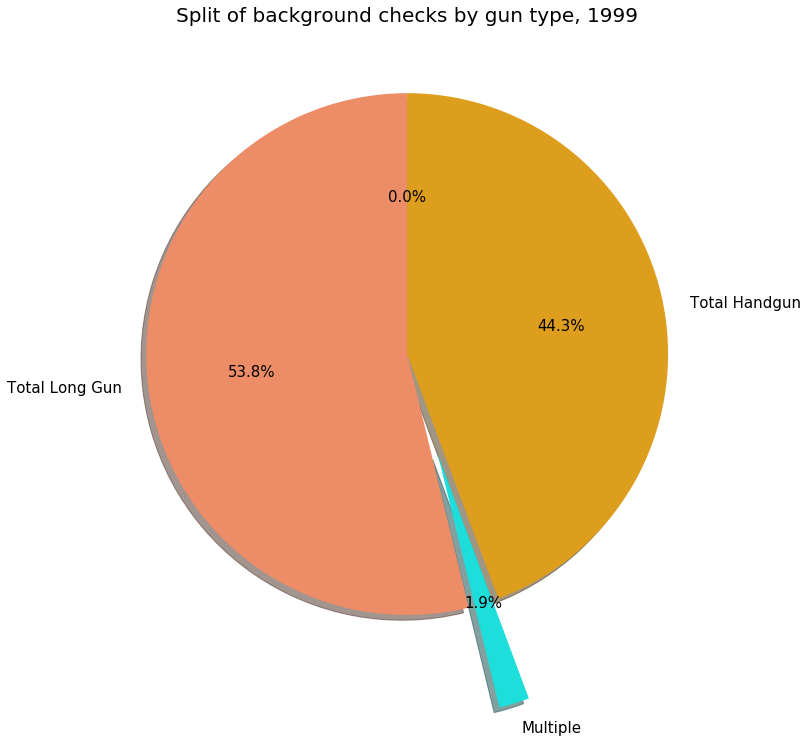

In [144]:
# build the pie chart for 1999
df_gun_ky_agg_1999.T.plot.pie(subplots=True,shadow=True,figsize=(12,12),fontsize=15, explode=(0,0.4,0,0),colors = ['#EC8D67','#1DDEDB','#DE9E1D','#AAEF90'],autopct='%1.1f%%',startangle=90)
plt.title('Split of Background Checks by Gun Type, 1999', fontsize=20)
plt.ylabel('')

Text(0, 0.5, '')

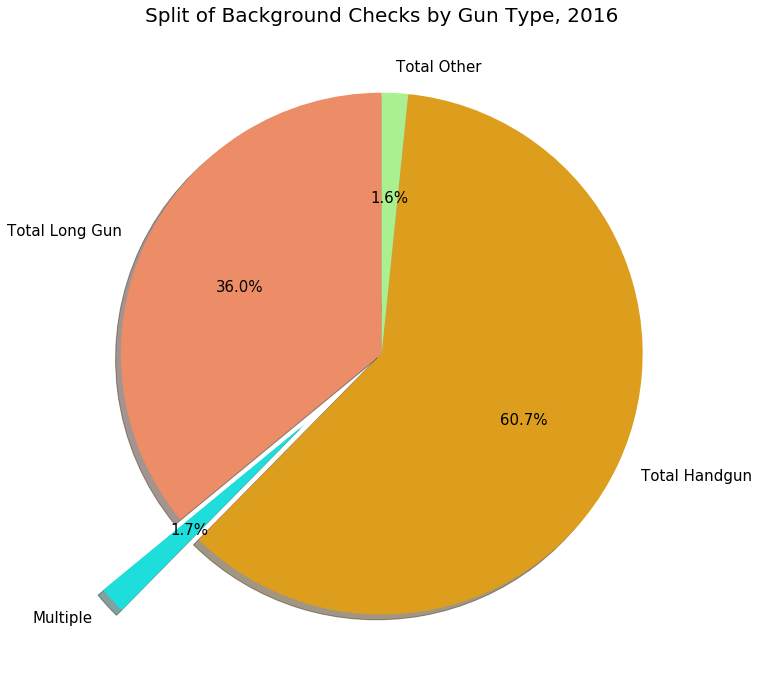

In [145]:
# build the pie chart for 2016
df_gun_ky_agg_2016.T.plot.pie(subplots=True,shadow=True,figsize=(12,12),fontsize=15, explode=(0,0.4,0,0),colors = ['#EC8D67','#1DDEDB','#DE9E1D','#AAEF90'],autopct='%1.1f%%',startangle=90)
plt.title('Split of Background Checks by Gun Type, 2016', fontsize=20)
plt.ylabel('')

### Question 2: Is there any seasonality in the trend for long gun and handgun background checks in the state of New York in the first decade of the XXI century (2000-2009)?

In order to answer this question, we will have to filter our dataframe and group it by certain timestamps.

In [101]:
# Filter data by the state "New York" and within years 2000-2009
df_gun_ny = df_gun.query('state == "New York"')
df_gun_ny = df_gun_ny.query('year >= 2000 & year < 2010')
df_gun_ny.state.unique(), df_gun_ny.year.unique()

(array(['New York'], dtype=object), <PeriodArray>
 ['2009', '2008', '2007', '2006', '2005', '2004', '2003', '2002', '2001',
  '2000']
 Length: 10, dtype: period[A-DEC])

In [100]:
# Check the correct filtering
df_gun_ny.year.unique()

<PeriodArray>
['2009', '2008', '2007', '2006', '2005', '2004', '2003', '2002', '2001',
 '2000']
Length: 10, dtype: period[A-DEC]

Now let's group our data by month and plot a line chart to take the first look at the trend.

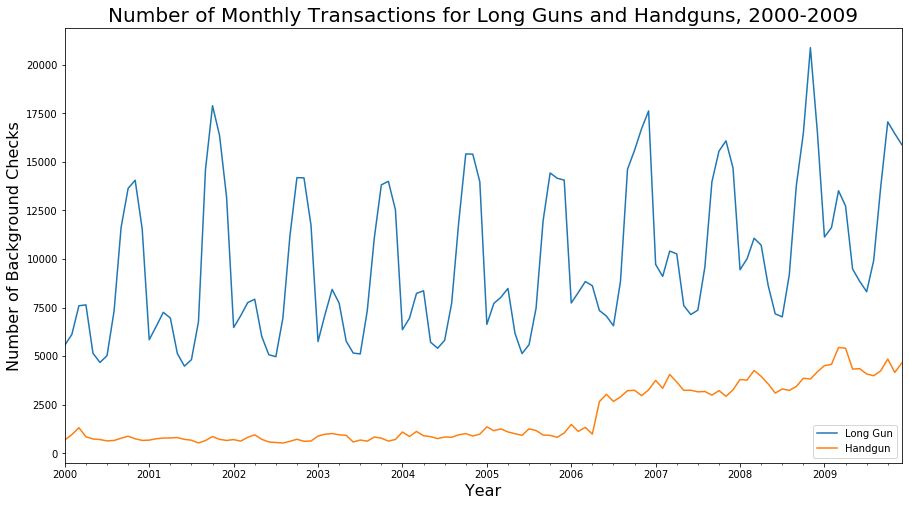

In [147]:
df_gun_ny_month = df_gun_ny.groupby('month')['total_long_gun','total_handgun'].sum().plot(figsize=(15,8))
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of Background Checks', fontsize=16)
plt.title('Number of Monthly Background Checks for Long Guns and Handguns, 2000-2009', fontsize=20)
plt.legend(['Long Gun','Handgun'],loc='lower right')

Looks like there is no seasonality for Handguns during years. However, we see that there is a very hign cyclicality in the Long Gun trend. On the first sight, it looks like there is a spike in every Q4.
Let's try and take a closer look!

(15000, 55710.25)

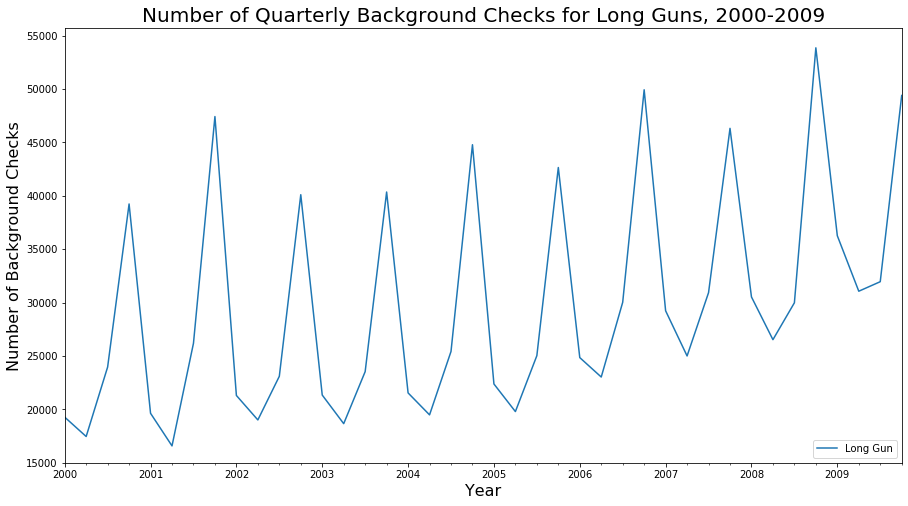

In [148]:
df_gun_ny_month = df_gun_ny.groupby('quarter')['total_long_gun'].sum().plot(figsize=(15,8))
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of Background Checks', fontsize=16)
plt.title('Number of Quarterly Background Checks for Long Guns, 2000-2009', fontsize=20)
plt.legend(['Long Gun'],loc='lower right')
plt.ylim(15000,)

Clearly, there is a strong trend in Q4!
Let's confirm: In which months of every year the highest background check activity for Long Guns occurred?

In [141]:
# Get the months with maximum amounts of long gun background checks
idx = df_gun_ny.groupby(['year'])['total_long_gun'].idxmax()
df_gun_ny[['year','quarter','month','long_gun']].loc[idx]

,year,quarter,month,long_gun
11144,2000,2000Q4,2000-11-01,14052
10539,2001,2001Q4,2001-10-01,17888
9879,2002,2002Q4,2002-10-01,14158
9164,2003,2003Q4,2003-11-01,13967
8559,2004,2004Q4,2004-10-01,15386
7899,2005,2005Q4,2005-10-01,14408
7129,2006,2006Q4,2006-12-01,17617
6524,2007,2007Q4,2007-11-01,16062
5864,2008,2008Q4,2008-11-01,20863
5259,2009,2009Q4,2009-10-01,17047


And what about the worst quarters in terms of performance? Looks like it's Q2 every year.
Let's confirm: In which months of every year the highest background check activity occurred?

In [146]:
# Get the months with minimum amounts of long gun transactions
idmin = df_gun_ny.groupby(['year'])['total_long_gun'].idxmin()
df_gun_ny[['year','quarter','month','long_gun']].loc[idmin]

,year,quarter,month,long_gun
11419,2000,2000Q2,2000-06-01,4674
10759,2001,2001Q2,2001-06-01,4485
10044,2002,2002Q3,2002-07-01,4958
9384,2003,2003Q3,2003-07-01,5098
8779,2004,2004Q2,2004-06-01,5400
8119,2005,2005Q2,2005-06-01,5122
7404,2006,2006Q3,2006-07-01,6554
6799,2007,2007Q2,2007-06-01,7131
6084,2008,2008Q3,2008-07-01,7014
5424,2009,2009Q3,2009-07-01,8313


<a id='conclusions'></a>
## Conclusions

### Observations regarding Question 1

As we can see, the split among the gun type in Kentucky has changed drastically over the years.
In 1999, background checks using Long Guns prevailed in Kentucky with 53.8% of total gun transactions, with 44.3% of items related to Handgun checks.

However, in 2016, the split show us complete dominance in Handgun transactions, amounting to 60.7%. Long Gun background check share fell from 53.8% in 1999 to 36.0% in 2017. Also, it bears mentioning that a new group of weapons - Other** - appeared in the split 

_(** mostly frames or receivers - NICS)._

### Observations regarding Question 2

As the data show us, there is no seasonality in Handgun background checks throughout the first decade of the XXI century (2000-2009).

However, we can notice a very high seasonality for Long Guns background checks during the same time frame:

• We can see that for every year in the decade, the Q2 and Q3 are the lowest quarters in terms of gun transactions. If we dig this deeper, we will see that the worst months are June and July. Most probably, it is due to the summer holidays, when lots of gun shop owners and employees are on vacations, along with clients and authorities.

• Q2 and Q3 are then followed by the spike of transactions in Q4. The most active months throughout the decade and October and November. Theoretically, it can be linked to a end-year holiday season with its numerous major holidays and sales periods (Thanksgiving, Black Friday, Cyber Monday, Christmas Day, New Year's Eve). 

• Then, after the holiday season there is always a drop in transactions in Q1 - it can probably be linked to the winter holiday season, when people stay indoors and don't do any hunting or shooting activity. Also, some people are out of town or even country.